In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
# loading the dataset
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)
# by entering 20000, we are taking the most frequent 20000 words

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [7]:
# apply padding, to make all the reviews of same length
x_train = pad_sequences(x_train,maxlen=100)
x_test = pad_sequences(x_test,maxlen=100)

In [8]:
x_train.shape,x_test.shape

((25000, 100), (25000, 100))

## BUILDING THE MODEL

In [9]:
# Define the object (initializing the RNN network)
model = tf.keras.models.Sequential()

In [10]:
# adding Embedding layer to compress input feature space into a smaller one
# turns words into their embeddings
model.add(tf.keras.layers.Embedding(input_dim=20000,output_dim=128,input_shape=(100,)))
# embedding layer can only be used as the 1st layer of the model and input_dim = no. of unique words in the model

In [11]:
# adding LSTM layer to understand relationship b/n diff. elements in a sequence, i.e here, diff. words in reviews
model.add(tf.keras.layers.LSTM(units=128,activation="tanh")) # units = no. of cells

In [12]:
# adding output layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile the model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
# instead of adam we use rmsprop as rmsprop works better than adam for sequences

In [17]:
history = model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 [==============================] - 11s 22ms/step - loss: 0.4557 - accuracy: 0.7910 - val_loss: 0.3810 - val_accuracy: 0.8390
Epoch 2/5
196/196 [==============================] - 3s 18ms/step - loss: 0.2885 - accuracy: 0.8854 - val_loss: 0.3577 - val_accuracy: 0.8522
Epoch 3/5
196/196 [==============================] - 4s 19ms/step - loss: 0.2295 - accuracy: 0.9107 - val_loss: 0.3575 - val_accuracy: 0.8425
Epoch 4/5
196/196 [==============================] - 4s 19ms/step - loss: 0.1873 - accuracy: 0.9291 - val_loss: 0.3934 - val_accuracy: 0.8331
Epoch 5/5
196/196 [==============================] - 4s 19ms/step - loss: 0.1540 - accuracy: 0.9428 - val_loss: 0.4744 - val_accuracy: 0.8273


In [18]:
# model predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [20]:
print(y_pred[10]),print(y_test[10])

[1]
1


(None, None)

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10964  1536]
 [ 2781  9719]]


In [22]:
acc_cm = accuracy_score(y_test,y_pred)

In [23]:
print(acc_cm)

0.82732


## LEARNING CURVE

In [24]:
# Plotting the learning curve
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

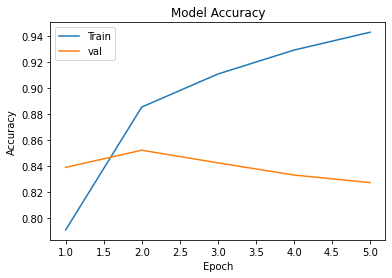

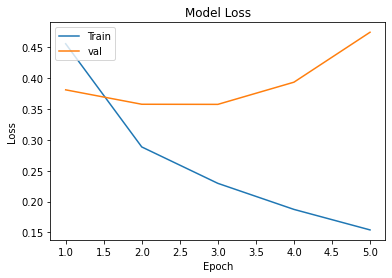

In [25]:
learning_curve(history,5)